In [6]:
import numpy as np

In [65]:
with np.load ('data_7_1 (1).npz') as data :
    x1 , y1 = data ['x1'] , data ['y1']
    x4 , y4 = data ['x4'] , data ['y4']
    x5 , y5 = data ['x5'] , data ['y5']

In [62]:
print(x1)
print(y1)

[   0.  349.  698. 1047. 1396. 1746. 2095. 2444. 2793. 3142. 3492. 4190.
 4889. 5587. 6285. 6984. 7682. 8381. 9079. 9778.]
[-0.99       -0.98961838 -0.98749461 -0.98666501 -0.98641613 -0.98628339
 -0.98611747 -0.98610088 -0.98583541 -0.98583541 -0.98556994 -0.91289696
 -0.1005857  -0.09056413 -0.08454123 -0.08233449 -0.08079144 -0.07750622
 -0.07218019 -0.05817654]


[-0.99, -1.2182106929980012, -1.121509238231224, -1.0201618286540968, -0.9752799714313325, -0.9699656600013379, -0.9788472874740585, -0.9871135256638551, -0.9903672326846663, -0.9897331556171902, -0.9877270460228044, -0.986150135077441, -0.9856059554911678, -0.9858526926415906, -0.9863551822426383, -0.9866900061553562, -0.9867045646237742, -0.986479396469283, -0.9861976281016339, -0.9860162661664926, -0.9859945183958104, -0.9860908274636666, -0.9862087340320691, -0.9862580022126395, -0.9862001755654508, -0.9860611265500444, -0.9859100667223856, -0.9858185691172223, -0.9858202679054384, -0.9858906004365329, -0.9859573439583863, -0.9859397664795562, -0.9858009229508288, -0.9855879388529994, -0.9854321083106142, -0.9854858566437971, -0.9857868117107057, -0.9860583167303185, -0.9854771418555487, -0.9824584591403906, -0.9745207336276409, -0.958295105650323, -0.9297325559737811, -0.884537114976976, -0.8188164045850345, -0.729896077025457, -0.6171985127414304, -0.48304618749591755, -0.3332246

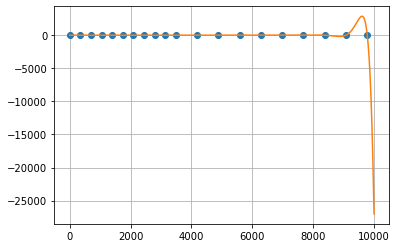

In [44]:
"1a"
import numpy as np
import matplotlib.pyplot as plt
def lagranz(x,y,t):
    P=0
    for k in range(len(x)):
        L=1
        for i in range(len(x)):
            if i!=k:
                L = L * (t - x[i])/(x[k] - x[i])
        P = P + y[k]*L
    return P
xx = np.linspace(0, 10000, 1000)
plt.plot(x1,y1,'o')
plt.plot(xx, lagranz(x1, y1, xx))
plt.grid(True)
plt.show()

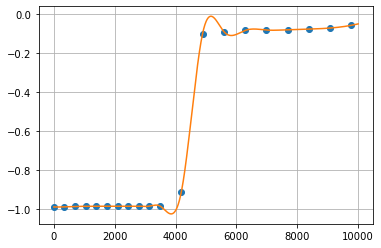

In [46]:
"1b"
from scipy import interpolate as inter
cs = inter.CubicSpline(x1 ,y1)
xx = np.linspace(0, 10000, 1000)
plt.plot(x1,y1,'o')
plt.plot(xx, cs(xx))
plt.grid(True)
plt.show()

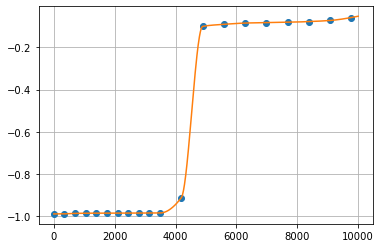

In [47]:
pc_int = inter.PchipInterpolator(x1, y1)
xx = np.linspace(0, 10000, 1000)
plt.plot(x1,y1,'o')
plt.plot(xx, pc_int(xx))
plt.grid(True)
plt.show()

<ipython-input-68-b202c52b9136>:10: RankWarning: Polyfit may be poorly conditioned
  postroenie(16)


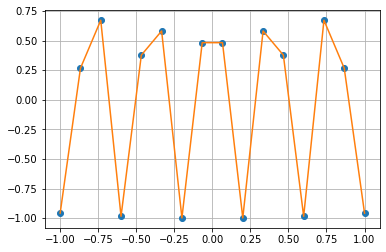

<ipython-input-68-b202c52b9136>:11: RankWarning: Polyfit may be poorly conditioned
  postroenie(32)


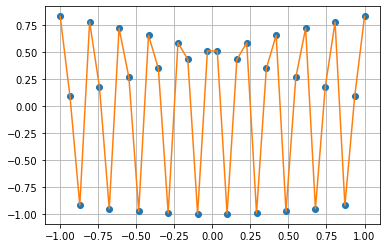

<ipython-input-68-b202c52b9136>:12: RankWarning: Polyfit may be poorly conditioned
  postroenie(64)


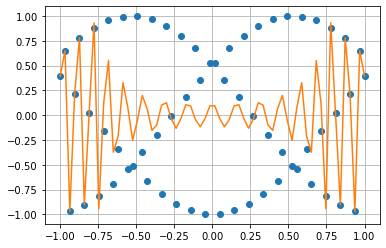

In [68]:
"2a"
def postroenie(n):
    x = np.linspace(-1, 1, n)
    y = np.cos(n*x)
    P = np.polyfit(x, y, n)
    plt.plot(x,y,'o')
    plt.plot(x, np.polyval(P,x))
    plt.grid(True)
    plt.show()
postroenie(16)
postroenie(32)
postroenie(64)

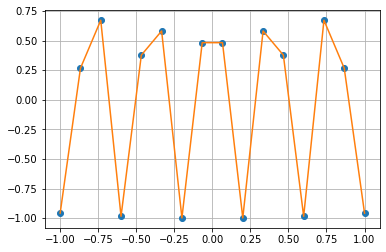

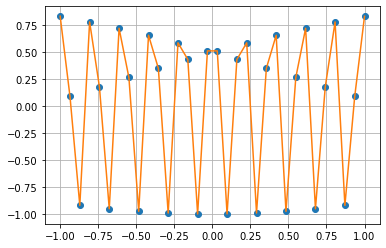

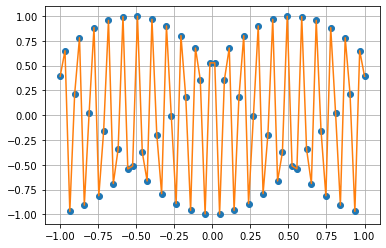

In [71]:
"2b"
def postroenie1(n):
    x = np.linspace(-1, 1, n)
    y = np.cos(n*x)
    plt.plot(x,y,'o')
    plt.plot(x, lagranz(x, y, x))
    plt.grid(True)
    plt.show()
postroenie1(16)
postroenie1(32)
postroenie1(64)

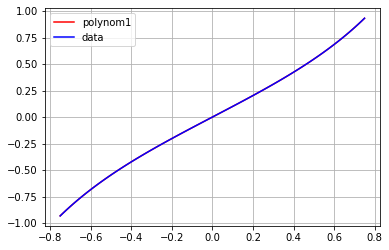

In [118]:
"3"
from scipy.optimize import curve_fit
def func1(x, p0, p1, p2, p3, p4, p5):
    return p0+p1*x+p2*(x**2)+p3*(x**3)+p4*(x**4)+p5*(x**5)
popt, pcov = curve_fit(func1, x4, y4)
plt.plot(x4,func1(x4, *popt),'r-',label='polynom1')
plt.plot(x4, y4, 'b-', label='data')
plt.grid(True)
plt.legend()
plt.show()

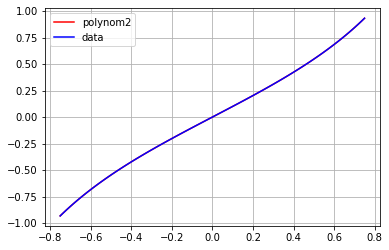

In [119]:
from scipy.optimize import curve_fit
def func2(x, p0, p1, p2, p3, q1, q2):
    return (p0+p1*x+p2*(x**2)+p3*(x**3))/(1+q1*x+q2*(x**2))
popt1, pcov1 = curve_fit(func2, x4, y4)
plt.plot(x4,func2(x4, *popt1),'r-',label='polynom2')
plt.plot(x4, y4, 'b-', label='data')
plt.legend()
plt.grid(True)
plt.show()

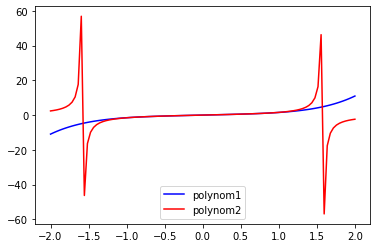

In [121]:
xx = np.linspace(-2, 2, 100)
plt.plot(xx,func1(xx, *popt),'b-',label='polynom1')
plt.plot(xx,func2(xx, *popt1),'r-',label='polynom2')
plt.legend()

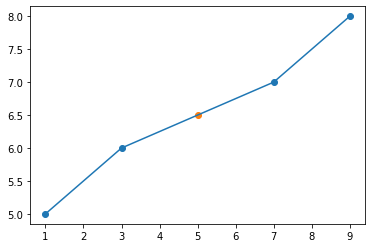

In [123]:
"4"
class spline_cub:
    def __init__(self, x, y):
        self.x = np.asarray(x, dtype=float)
        self.y = np.asarray(y, dtype=float)
        
        n = len(x) - 1
        self.n = n
        A = np.zeros((n, n))
        h = np.zeros(n+1)
        for i in range(1,n+1):
            h[i] = x[i] - x[i-1]
        self.h = np.asarray(h, dtype=float)
        
        
        for i in range(2,n):
            A[i-1, i-2] = h[i]
            A[i-1, i-1] = 2 * (h[i+1] + h[i])
            A[i-1, i ] = h[i+1]
        A[0, 0] = 2*(h[2] + h[1])
        A[0, 1] = h[2]
        A[0, n-1] = h[1]
        A[n-1, 0] = h[1]
        A[n-1, n - 2] = h[n]
        A[n-1, n-1] = 2 * (h[n] + h[1])
        с = np.zeros(n)
        for i in range(2, n):
            с[i-1] = 3 * ((y[i+1] - y[i])/h[i+1] - (y[i] - y[i-1]/h[i]))
        с[0] = 3 * ((y[1] - y[0])/h[1] - (y[0] - y[n])/h[n])
        с[n-1] = 3 * ((y[1] - y[n])/h[1] - (y[n] - y[n-1])/h[n])
        self.res = np.linalg.solve(A, с)
        C = np.zeros((n, n))
        C[0, 0] = self.y[1]
        C[1, 0] = h[1] * (2 * self.res[0] + self.res[n-1])/3 + (C[0, 0] - self.y[0])/h[1] 
        C[2, 0] = self.res[0]
        C[3, 0] = (self.res[0] - self.res[n-1])/(3 * h[1])
        for i in range(1,n-1):
            C[0, i] = y[i+1]#a
            C[1, i] = h[i+1] * (2 * self.res[i] + self.res[i-1])/3 + (C[0, i] - y[i])/h[i+1]#b
            C[2, i] = self.res[i] #c
            C[3, i] = (self.res[i] - self.res[i-1])/(3 * h[i+1])#d
        C[0, n-1] = y[n]
        C[1, n-1] = h[n] * (2 * self.res[n-1] + self.res[n-2])/3 + (C[0, n-1] - y[n-1])/h[n] 
        C[2, n-1] = self.res[n-1]
        C[3, n-1] = (self.res[n-1] - self.res[n-2])/(3 * h[n])
        self.C = np.asarray(C, dtype=float)
        
        
    def __call__(self, x0):
        for i in range(0, self.n):
            if x0 >= self.x[i] and x0 < self.x[i + 1]:
                return self.C[0, i] + self.C[1, i] * (x0-self.x[i+1]) + self.C[2, i] * (x0-self.x[i+1])**2 + self.C[3, i] * (x0-self.x[i+1])**3

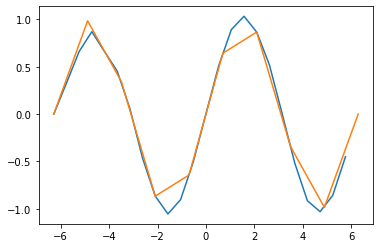

In [126]:
xx = np.linspace(-2 * np.pi, 2 * np.pi, 10)
yy = np.sin(xx)
k = spline_cub(xx, yy)
a = np.linspace(-2 * np.pi, 2*np.pi, 25)
b = np.zeros(25)
for i in range(25):
    b[i] = k(a[i])
plt.plot(a, b)
plt.plot(xx, yy)
plt.show()

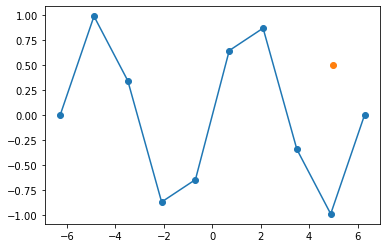

In [133]:
"5"
import matplotlib.pyplot as plt
class SplineTuple:
    def __init__(self, a, b, c, d, x):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.x = x
        
def BuildSpline(x, y, n):
    splines = [SplineTuple(0, 0, 0, 0, 0) for _ in range(0, n)]
    for i in range(0, n):
        splines[i].x = x[i]
        splines[i].a = y[i]
    
    splines[0].c = splines[n - 1].c = 0.0
    alpha = [0.0 for _ in range(0, n - 1)]
    beta  = [0.0 for _ in range(0, n - 1)]
 
    for i in range(1, n - 1):
        hi  = x[i] - x[i - 1]
        hi1 = x[i + 1] - x[i]
        A = hi
        C = 2.0 * (hi + hi1)
        B = hi1
        F = 6.0 * ((y[i + 1] - y[i]) / hi1 - (y[i] - y[i - 1]) / hi)
        z = (A * alpha[i - 1] + C)
        alpha[i] = -B / z
        beta[i] = (F - A * beta[i - 1]) / z
  
 
    for i in range(n - 2, 0, -1):
        splines[i].c = alpha[i] * splines[i + 1].c + beta[i]
    
    for i in range(n - 1, 0, -1):
        hi = x[i] - x[i - 1]
        splines[i].d = (splines[i].c - splines[i - 1].c) / hi
        splines[i].b = hi * (2.0 * splines[i].c + splines[i - 1].c) / 6.0 + (y[i] - y[i - 1]) / hi
    return splines
 
def Interpolate(splines, x):
    if not splines:
        return None 
    
    n = len(splines)
    s = SplineTuple(0, 0, 0, 0, 0)
    
    if x <= splines[0].x: 
        s = splines[0]
    elif x >= splines[n - 1].x: 
        s = splines[n - 1]
    else: 
        i = 0
        j = n - 1
        while i + 1 < j:
            k = i + (j - i) // 2
            if x <= splines[k].x:
                j = k
            else:
                i = k
        s = splines[j]
    
    dx = x - s.x
    return s.a + (s.b + (s.c + s.d * dx) * dx) * dx;
    
 
xx = np.linspace(-2 * np.pi, 2 * np.pi, 10)
yy = np.sin(xx)
new_x = 5
 
spline = BuildSpline(xx, yy, len(xx))
 
plt.scatter(xx, yy)
plt.plot(xx, yy)
plt.scatter(new_x, Interpolate(spline, new_x))
plt.show()